In [54]:
import time
import itertools

import pandas as pd
from simulation_helpers import (one_sim_mode, one_sim_mode_serial, 
                                generate_gaussian_instance_nonlinear_interaction_simple,
                                generate_gaussian_instance_nonlinear_interaction,
                                )
from spline_instance import generate_gaussian_instance_nonlinear_interaction_block
from multiprocessing import Pool

from functools import partial

In [38]:
def interaction_filter_vary_mode(inst, nsim=100, use_MLE=True, parallel=True,
                                 ncores=8, full_corr=False):
    """
    Compare to R randomized lasso
    """

    # Operating characteristics
    oper_char = {}
    oper_char["coverage rate"] = []
    oper_char["avg length"] = []
    oper_char["method"] = []
    oper_char["F1 score interaction"] = []
    oper_char["|G|"] = []
    oper_char["mode"] = []
    oper_char["SNR"] = []
    p = 30
    SNR = 1
    intercept_flag = True
    
    """
    GOOD RESULT:
    1. 
    p = 30
    SNR = 1
    intercept_flag = True
    ### Partially correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
                           
    2. 
    p = 30
    SNR = 0.5
    intercept_flag = True
    ### Fully correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
    """
    if parallel:
        oper_char_list = []
        
    for mode in ["stronghierarchy", "weakhierarchy", "allpairs"]:  
        if parallel:
            with Pool(ncores) as pool:
                results = pool.map(partial(one_sim_mode, SNR=SNR, 
                                           intercept_flag=intercept_flag,
                                           p=p, use_MLE=use_MLE, mode=mode,
                                           weight_frac=1.5, 
                                           inst=inst,
                                           rho=0.5, rho_noise=0.5, full_corr=full_corr),
                                   list(range(nsim)))
            oper_char_list = oper_char_list + results
        else:
            for i in range(nsim):
                print(i, "th simulation for mode:", mode)
                
                one_sim_mode_serial(SNR=SNR, intercept_flag=intercept_flag,
                             p=p, oper_char=oper_char, use_MLE=use_MLE,
                             mode=mode)
    if parallel:
        oper_char_list = list(itertools.chain(*oper_char_list))
        oper_char = pd.DataFrame(oper_char_list)
        oper_char.columns = ["coverage rate","avg length","F1 score interaction",
                             "method", "|G|", "mode", "SNR"]
        return oper_char
    else:
        return pd.DataFrame(oper_char)

In [29]:
# 328s for 8 iters with 8 cores
oper_char_mode_nl\
    = interaction_filter_vary_mode(inst=generate_gaussian_instance_nonlinear_interaction,
                                   nsim=40, use_MLE=True, parallel=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 7
Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 3
Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 5
Equally spaced quantile knots used.
DS Selection Size: 14
Naive Selection Size: 1
Equally spaced quantile knots used.
DS Selection Size: 3
Naive Selection Size: 5
Equally spaced quantile knots used.
DS Selection Size: 4
Naive Selection Size: 5
Equally spaced quantile knots used.
DS Selection Size: 6
Naive Selection Size: 9
Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 2
Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 5
Equally spaced quantile knots used.
DS Selection Size: 9
Naive Selection Size: 18
Equally spaced quantile knots used.
DS Selection Size: 6
Naive Selection Size: 9
Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 6
Equally spaced quantile kn

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 44
Naive Selection Size: 48
Equally spaced quantile knots used.
DS Selection Size: 44
Naive Selection Size: 29
Equally spaced quantile knots used.
DS Selection Size: 50
Naive Selection Size: 51
Equally spaced quantile knots used.
DS Selection Size: 11
Naive Selection Size: 43
Equally spaced quantile knots used.
DS Selection Size: 64
Naive Selection Size: 45
Equally spaced quantile knots used.
DS Selection Size: 24
Naive Selection Size: 34
Equally spaced quantile knots used.
DS Selection Size: 60
Naive Selection Size: 78
Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 50
Equally spaced quantile knots used.
DS Selection Size: 45
Naive Selection Size: 30
Equally spaced quantile knots used.
DS Selection Size: 68
Naive Selection Size: 37
Equally spaced quantile knots used.
DS Selection Size: 39
Naive Selection Size: 41
Equally spaced quantile knots used.
DS Selection Size: 102
Naive Selection Size: 97
Equ

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 65
Naive Selection Size: 64
Equally spaced quantile knots used.
DS Selection Size: 91
Naive Selection Size: 50
Equally spaced quantile knots used.
DS Selection Size: 89
Naive Selection Size: 70
Equally spaced quantile knots used.
DS Selection Size: 15
Naive Selection Size: 85
Equally spaced quantile knots used.
DS Selection Size: 141
Naive Selection Size: 92
Equally spaced quantile knots used.
DS Selection Size: 42
Naive Selection Size: 53
Equally spaced quantile knots used.
DS Selection Size: 98
Naive Selection Size: 147
Equally spaced quantile knots used.
DS Selection Size: 105
Naive Selection Size: 111
Equally spaced quantile knots used.
DS Selection Size: 92
Naive Selection Size: 66
Equally spaced quantile knots used.
DS Selection Size: 145
Naive Selection Size: 75
Equally spaced quantile knots used.
DS Selection Size: 111
Naive Selection Size: 70
Equally spaced quantile knots used.
DS Selection Size: 347
Naive Selection Size: 

In [30]:
# 328s for 8 iters with 8 cores
oper_char_mode_simple\
    = interaction_filter_vary_mode(inst=generate_gaussian_instance_nonlinear_interaction_simple,
                                   nsim=40, use_MLE=True, parallel=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 14
Naive Selection Size: 9
Equally spaced quantile knots used.
DS Selection Size: 12
Naive Selection Size: 24
Equally spaced quantile knots used.
DS Selection Size: 5
Naive Selection Size: 9
Equally spaced quantile knots used.
DS Selection Size: 8
Naive Selection Size: 3
Equally spaced quantile knots used.
DS Selection Size: 11
Naive Selection Size: 27
Equally spaced quantile knots used.
DS Selection Size: 9
Naive Selection Size: 9
Equally spaced quantile knots used.
DS Selection Size: 13
Naive Selection Size: 22
Equally spaced quantile knots used.
DS Selection Size: 1
Naive Selection Size: 13
Equally spaced quantile knots used.
DS Selection Size: 23
Naive Selection Size: 20
Equally spaced quantile knots used.
DS Selection Size: 12
Naive Selection Size: 27
Equally spaced quantile knots used.
DS Selection Size: 25
Naive Selection Size: 28
Equally spaced quantile knots used.
DS Selection Size: 6
Naive Selection Size: 12
Equally space

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 86
Naive Selection Size: 69
Equally spaced quantile knots used.
DS Selection Size: 40
Naive Selection Size: 38
Equally spaced quantile knots used.
DS Selection Size: 36
Naive Selection Size: 17
Equally spaced quantile knots used.
DS Selection Size: 30
Naive Selection Size: 51
Equally spaced quantile knots used.
DS Selection Size: 64
Naive Selection Size: 58
Equally spaced quantile knots used.
DS Selection Size: 48
Naive Selection Size: 39
Equally spaced quantile knots used.
DS Selection Size: 81
Naive Selection Size: 45
Equally spaced quantile knots used.
DS Selection Size: 63
Naive Selection Size: 64
Equally spaced quantile knots used.
DS Selection Size: 68
Naive Selection Size: 83
Equally spaced quantile knots used.
DS Selection Size: 92
Naive Selection Size: 89
Equally spaced quantile knots used.
DS Selection Size: 71
Naive Selection Size: 80
Equally spaced quantile knots used.
DS Selection Size: 38
Naive Selection Size: 66
Equa

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 67
Naive Selection Size: 94
Equally spaced quantile knots used.
DS Selection Size: 142
Naive Selection Size: 101
Equally spaced quantile knots used.
DS Selection Size: 72
Naive Selection Size: 75
Equally spaced quantile knots used.
DS Selection Size: 169
Naive Selection Size: 52
Equally spaced quantile knots used.
DS Selection Size: 79
Naive Selection Size: 97
Equally spaced quantile knots used.
DS Selection Size: 66
Naive Selection Size: 36
Equally spaced quantile knots used.
DS Selection Size: 60
Naive Selection Size: 110
Equally spaced quantile knots used.
DS Selection Size: 107
Naive Selection Size: 104
Equally spaced quantile knots used.
DS Selection Size: 83
Naive Selection Size: 71
Equally spaced quantile knots used.
DS Selection Size: 112
Naive Selection Size: 111
Equally spaced quantile knots used.
DS Selection Size: 34
Naive Selection Size: 116
Equally spaced quantile knots used.
DS Selection Size: 125
Naive Selection Siz

In [ ]:
oper_char_mode_nl_full\
    = interaction_filter_vary_mode(inst=generate_gaussian_instance_nonlinear_interaction,
                                   nsim=40, use_MLE=True, parallel=True,
                                   full_corr=True)

In [55]:
oper_char_mode_nl_block \
    = interaction_filter_vary_mode(inst=generate_gaussian_instance_nonlinear_interaction_block,
                                   nsim = 40, use_MLE = False, parallel = True,full_corr = True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 4
Naive Selection Size: 7
Equally spaced quantile knots used.
DS Selection Size: 5
Naive Selection Size: 10
Equally spaced quantile knots used.
DS Selection Size: 6
Naive Selection Size: 5
Equally spaced quantile knots used.
DS Selection Size: 2
Naive Selection Size: 1
Equally spaced quantile knots used.
DS Selection Size: 11
Naive Selection Size: 16
Equally spaced quantile knots used.
DS Selection Size: 0
Naive Selection Size: 1
Equally spaced quantile knots used.
DS Selection Size: 0
Naive Selection Size: 0
Equally spaced quantile knots used.
DS Selection Size: 15
Naive Selection Size: 14
Equally spaced quantile knots used.
DS Selection Size: 5
Naive Selection Size: 18
Equally spaced quantile knots used.
DS Selection Size: 0
Naive Selection Size: 2
Equally spaced quantile knots used.
DS Selection Size: 9
Naive Selection Size: 10
Equally spaced quantile knots used.
DS Selection Size: 0
Naive Selection Size: 1
Equally spaced quanti

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 94
Naive Selection Size: 38
Equally spaced quantile knots used.
DS Selection Size: 16
Naive Selection Size: 35
Equally spaced quantile knots used.
DS Selection Size: 15
Naive Selection Size: 23
Equally spaced quantile knots used.
DS Selection Size: 42
Naive Selection Size: 25
Equally spaced quantile knots used.
DS Selection Size: 88
Naive Selection Size: 47
Equally spaced quantile knots used.
DS Selection Size: 19
Naive Selection Size: 17
Equally spaced quantile knots used.
DS Selection Size: 24
Naive Selection Size: 48
Equally spaced quantile knots used.
DS Selection Size: 44
Naive Selection Size: 19
Equally spaced quantile knots used.
DS Selection Size: 39
Naive Selection Size: 29
Equally spaced quantile knots used.
DS Selection Size: 43
Naive Selection Size: 57
Equally spaced quantile knots used.
DS Selection Size: 32
Naive Selection Size: 35
Equally spaced quantile knots used.
DS Selection Size: 49
Naive Selection Size: 37
Equa

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 98
Naive Selection Size: 171
Equally spaced quantile knots used.
DS Selection Size: 75
Naive Selection Size: 72
Equally spaced quantile knots used.
DS Selection Size: 35
Naive Selection Size: 49
Equally spaced quantile knots used.
DS Selection Size: 116
Naive Selection Size: 98
Equally spaced quantile knots used.
DS Selection Size: 295
Naive Selection Size: 71
Equally spaced quantile knots used.
DS Selection Size: 52
Naive Selection Size: 85
Equally spaced quantile knots used.
DS Selection Size: 40
Naive Selection Size: 87
Equally spaced quantile knots used.
DS Selection Size: 84
Naive Selection Size: 54
Equally spaced quantile knots used.
DS Selection Size: 72
Naive Selection Size: 64
Equally spaced quantile knots used.
DS Selection Size: 79
Naive Selection Size: 90
Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 65
Equally spaced quantile knots used.
DS Selection Size: 169
Naive Selection Size: 66


In [40]:
def interaction_filter_vary_SNR(inst, nsim=100, use_MLE=True, parallel=True,
                                ncores=8, full_corr=False):
    """
    Compare to R randomized lasso
    """

    # Operating characteristics
    oper_char = {}
    oper_char["coverage rate"] = []
    oper_char["avg length"] = []
    oper_char["method"] = []
    oper_char["F1 score interaction"] = []
    oper_char["|G|"] = []
    oper_char["mode"] = []
    oper_char["SNR"] = []
    
    p = 30
    mode = 'weakhierarchy'
    intercept_flag = True
    
    """
    GOOD RESULT:
    1. 
    p = 30
    SNR = 1
    intercept_flag = True
    ### Partially correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
                           
    2. 
    p = 30
    SNR = 0.5
    intercept_flag = True
    ### Fully correlated
    (design, data_interaction, Y, Y_mean, data_combined,
                 groups, active, active_inter_adj, active_inter_list) \
                    = inst(n=500, p_nl=p, p_l=0, s_l=0,
                           nknots=6, degree=2, SNR=SNR, rho=0.5, rho_noise=0.5,
                           center=False, scale=False, random_signs=True,
                           intercept=intercept_flag, structure='weakhierarchy', 
                           s_interaction=10, interaction_signal=2)
    weight_frac = 2
    """
    if parallel:
        oper_char_list = []
        
    for SNR in [0.1, 0.5, 1, 2]:  
        if parallel:
            with Pool(ncores) as pool:
                results = pool.map(partial(one_sim_mode, SNR=SNR, 
                                           intercept_flag=intercept_flag,
                                           p=p, use_MLE=use_MLE, mode=mode,
                                           weight_frac=2, 
                                           inst=inst,
                                           rho=0.5, rho_noise=0.5, full_corr=full_corr),
                                   list(range(nsim)))
            oper_char_list = oper_char_list + results
        else:
            for i in range(nsim):
                print(i, "th simulation for mode:", mode)
                
                one_sim_mode_serial(SNR=SNR, intercept_flag=intercept_flag,
                             p=p, oper_char=oper_char, use_MLE=use_MLE,
                             mode=mode)
    if parallel:
        oper_char_list = list(itertools.chain(*oper_char_list))
        oper_char = pd.DataFrame(oper_char_list)
        oper_char.columns = ["coverage rate","avg length","F1 score interaction",
                             "method", "|G|", "mode", "SNR"]
        return oper_char
    else:
        return pd.DataFrame(oper_char)

In [31]:
oper_char_SNR_nl\
    = interaction_filter_vary_SNR(inst=generate_gaussian_instance_nonlinear_interaction,
                                  nsim=40,
                                  use_MLE=True, parallel=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knot

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 25
Naive Selection Size: 31
Equally spaced quantile knots used.
DS Selection Size: 59
Naive Selection Size: 104
Equally spaced quantile knots used.
DS Selection Size: 64
Naive Selection Size: 66
Equally spaced quantile knots used.
DS Selection Size: 28
Naive Selection Size: 48
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 47
Naive Selection Size: 58
Equally spaced quantile knots used.
DS Selection Size: 37
Naive Selection Size: 83
Equally spaced quantile knots used.
DS Selection Size: 13
Naive Selection Size: 30
Equally spaced quantile knots used.
DS Selection Size: 59
Naive Selection Size: 57
Equally spaced quantile knots used.
DS Selection Size: 24
Naive Selection Size: 41
Equally spaced quantile knots used.
DS Selection Size: 38
Naive Selection Size: 50
Equally spaced quantile knots used.
DS Selection Size: 50
Naive Selection Size: 63
Equally spaced quantile knots used.
DS Selection S

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 24
Naive Selection Size: 133
Equally spaced quantile knots used.
DS Selection Size: 65
Naive Selection Size: 48
Equally spaced quantile knots used.
DS Selection Size: 35
Naive Selection Size: 55
Equally spaced quantile knots used.
DS Selection Size: 53
Naive Selection Size: 66
Equally spaced quantile knots used.
DS Selection Size: 46
Naive Selection Size: 44
Equally spaced quantile knots used.
DS Selection Size: 27
Naive Selection Size: 40
Equally spaced quantile knots used.
DS Selection Size: 126
Naive Selection Size: 94
Equally spaced quantile knots used.
DS Selection Size: 52
Naive Selection Size: 62
Equally spaced quantile knots used.
DS Selection Size: 75
Naive Selection Size: 39
Equally spaced quantile knots used.
DS Selection Size: 58
Naive Selection Size: 111
Equally spaced quantile knots used.
DS Selection Size: 29
Naive Selection Size: 68
Equally spaced quantile knots used.
DS Selection Size: 66
Naive Selection Size: 60
E

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 61
Naive Selection Size: 57
Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 59
Equally spaced quantile knots used.
DS Selection Size: 80
Naive Selection Size: 111
Equally spaced quantile knots used.
DS Selection Size: 61
Naive Selection Size: 66
Equally spaced quantile knots used.
DS Selection Size: 57
Naive Selection Size: 57
Equally spaced quantile knots used.
DS Selection Size: 43
Naive Selection Size: 54
Equally spaced quantile knots used.
DS Selection Size: 74
Naive Selection Size: 58
Equally spaced quantile knots used.
DS Selection Size: 50
Naive Selection Size: 83
Equally spaced quantile knots used.
DS Selection Size: 30
Naive Selection Size: 50
Equally spaced quantile knots used.
DS Selection Size: 61
Naive Selection Size: 78
Equally spaced quantile knots used.
DS Selection Size: 105
Naive Selection Size: 60
Equally spaced quantile knots used.
DS Selection Size: 77
Naive Selection Size: 74
Eq

In [32]:
oper_char_SNR_simple\
    = interaction_filter_vary_SNR(inst=generate_gaussian_instance_nonlinear_interaction_simple,
                                  nsim=40,
                                  use_MLE=True, parallel=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knot

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 48
Naive Selection Size: 19
Equally spaced quantile knots used.
DS Selection Size: 70
Naive Selection Size: 60
Equally spaced quantile knots used.
DS Selection Size: 72
Naive Selection Size: 63
Equally spaced quantile knots used.
DS Selection Size: 33
Naive Selection Size: 22
Equally spaced quantile knots used.
DS Selection Size: 70
Naive Selection Size: 52
Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 23
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 16
Naive Selection Size: 26
Equally spaced quantile knots used.
DS Selection Size: 33
Naive Selection Size: 52
Equally spaced quantile knots used.
DS Selection Size: 56
Naive Selection Size: 38
Equally spaced quantile knots used.
DS Selection Size: 81
Naive Selection Size: 54
Equally spaced quantile knots used.
DS Selection Size: 88
Naive Selection Size: 38
Equally spaced quantile knots used.
DS Selection Si

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 100
Naive Selection Size: 60
Equally spaced quantile knots used.
DS Selection Size: 58
Naive Selection Size: 63
Equally spaced quantile knots used.
DS Selection Size: 62
Naive Selection Size: 77
Equally spaced quantile knots used.
DS Selection Size: 61
Naive Selection Size: 73
Equally spaced quantile knots used.
DS Selection Size: 60
Naive Selection Size: 54
Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 39
Equally spaced quantile knots used.
DS Selection Size: 75
Naive Selection Size: 54
Equally spaced quantile knots used.
DS Selection Size: 38
Naive Selection Size: 43
Equally spaced quantile knots used.
DS Selection Size: 43
Naive Selection Size: 47
Equally spaced quantile knots used.
DS Selection Size: 61
Naive Selection Size: 83
Equally spaced quantile knots used.
DS Selection Size: 97
Naive Selection Size: 120
Equally spaced quantile knots used.
DS Selection Size: 46
Naive Selection Size: 54
Eq

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 125
Naive Selection Size: 85
Equally spaced quantile knots used.
DS Selection Size: 74
Naive Selection Size: 76
Equally spaced quantile knots used.
DS Selection Size: 79
Naive Selection Size: 81
Equally spaced quantile knots used.
DS Selection Size: 78
Naive Selection Size: 91
Equally spaced quantile knots used.
DS Selection Size: 79
Naive Selection Size: 85
Equally spaced quantile knots used.
DS Selection Size: 39
Naive Selection Size: 71
Equally spaced quantile knots used.
DS Selection Size: 100
Naive Selection Size: 77
Equally spaced quantile knots used.
DS Selection Size: 80
Naive Selection Size: 91
Equally spaced quantile knots used.
DS Selection Size: 65
Naive Selection Size: 35
Equally spaced quantile knots used.
DS Selection Size: 97
Naive Selection Size: 101
Equally spaced quantile knots used.
DS Selection Size: 108
Naive Selection Size: 136
Equally spaced quantile knots used.
DS Selection Size: 75
Naive Selection Size: 72

In [53]:
oper_char_SNR_nl_full\
    = interaction_filter_vary_SNR(inst=generate_gaussian_instance_nonlinear_interaction,
                                  nsim=40,
                                  use_MLE=True, parallel=True,full_corr=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 10
Naive Selection Size: 3
Equally spaced quantile knots used.
Equally spaced quantile knots used.
DS Selection Size: 37
Naive Selection Size: 6
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally 

Process SpawnPoolWorker-359:
Process SpawnPoolWorker-358:
Process SpawnPoolWorker-360:
Process SpawnPoolWorker-353:
Process SpawnPoolWorker-356:
Process SpawnPoolWorker-355:
Traceback (most recent call last):
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    res = self._reader.recv_bytes()
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/connection.py", line 221, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/Users/yilingh/opt/anaconda3/lib/python3.9/multiprocessing/connection.py", line 419, in _recv_bytes
    buf = self._recv(4)
  File

KeyboardInterrupt: 

In [58]:
oper_char_SNR_nl_block\
    = interaction_filter_vary_SNR(inst=generate_gaussian_instance_nonlinear_interaction_block,
                                  nsim=40,
                                  use_MLE=False, parallel=True,full_corr=True)

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knots used.
Equally spaced quantile knot

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 10
Naive Selection Size: 33
Equally spaced quantile knots used.
DS Selection Size: 50
Naive Selection Size: 32
Equally spaced quantile knots used.
DS Selection Size: 20
Naive Selection Size: 29
Equally spaced quantile knots used.
DS Selection Size: 38
Naive Selection Size: 37
Equally spaced quantile knots used.
DS Selection Size: 41
Naive Selection Size: 19
Equally spaced quantile knots used.
DS Selection Size: 17
Naive Selection Size: 22
Equally spaced quantile knots used.
DS Selection Size: 68
Naive Selection Size: 24
Equally spaced quantile knots used.
DS Selection Size: 29
Naive Selection Size: 16
Equally spaced quantile knots used.
DS Selection Size: 42
Naive Selection Size: 40
Equally spaced quantile knots used.
DS Selection Size: 66
Naive Selection Size: 38
Equally spaced quantile knots used.
DS Selection Size: 3
Naive Selection Size: 9
Equally spaced quantile knots used.
DS Selection Size: 41
Naive Selection Size: 28
Equall

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 37
Naive Selection Size: 24
Equally spaced quantile knots used.
DS Selection Size: 22
Naive Selection Size: 19
Equally spaced quantile knots used.
DS Selection Size: 34
Naive Selection Size: 37
Equally spaced quantile knots used.
DS Selection Size: 26
Naive Selection Size: 24
Equally spaced quantile knots used.
DS Selection Size: 19
Naive Selection Size: 21
Equally spaced quantile knots used.
DS Selection Size: 53
Naive Selection Size: 45
Equally spaced quantile knots used.
DS Selection Size: 10
Naive Selection Size: 13
Equally spaced quantile knots used.
DS Selection Size: 60
Naive Selection Size: 48
Equally spaced quantile knots used.
DS Selection Size: 80
Naive Selection Size: 25
Equally spaced quantile knots used.
DS Selection Size: 44
Naive Selection Size: 29
Equally spaced quantile knots used.
DS Selection Size: 16
Naive Selection Size: 23
Equally spaced quantile knots used.
DS Selection Size: 26
Naive Selection Size: 21
Equa

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')
/Users/yilingh/Desktop/PhD/SI_Codes/SI-Interaction/env3/lib/python3.9/site-packages/r

Equally spaced quantile knots used.
DS Selection Size: 100
Naive Selection Size: 56
Equally spaced quantile knots used.
DS Selection Size: 50
Naive Selection Size: 41
Equally spaced quantile knots used.
DS Selection Size: 12
Naive Selection Size: 32
Equally spaced quantile knots used.
DS Selection Size: 55
Naive Selection Size: 36
Equally spaced quantile knots used.
DS Selection Size: 51
Naive Selection Size: 68
Equally spaced quantile knots used.
DS Selection Size: 104
Naive Selection Size: 41
Equally spaced quantile knots used.
DS Selection Size: 31
Naive Selection Size: 30
Equally spaced quantile knots used.
DS Selection Size: 84
Naive Selection Size: 81
Equally spaced quantile knots used.
DS Selection Size: 109
Naive Selection Size: 53
Equally spaced quantile knots used.
DS Selection Size: 39
Naive Selection Size: 60
Equally spaced quantile knots used.
DS Selection Size: 35
Naive Selection Size: 50
Equally spaced quantile knots used.
DS Selection Size: 69
Naive Selection Size: 63
E

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
def plotting(oper_char_df, x_axis='p', hue='method'):
    oper_char_df_copy = oper_char_df.copy()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

    # print("Mean coverage rate/length:")
    # print(oper_char_df.groupby([x_axis, hue]).mean())
    my_palette = {"MLE": "#48c072",
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}

    alias = {"stronghierarchy": "Strong",
             "weakhierarchy": "Weak",
             "allpairs": "All"}
    if x_axis == 'mode':
        oper_char_df_copy['mode'] = oper_char_df_copy['mode'].map(alias)

    cov_plot = sns.boxplot(y=oper_char_df_copy["coverage rate"],
                           x=oper_char_df_copy[x_axis],
                           hue=oper_char_df_copy[hue],
                           palette=my_palette,
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    # plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    # ax1.set_ylabel("")  # remove y label, but keep ticks
    ax1.set_xlabel(x_axis)

    len_plot = sns.boxplot(y=oper_char_df_copy["avg length"],
                           x=oper_char_df_copy[x_axis],
                           hue=oper_char_df_copy[hue],
                           palette=my_palette,
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks
    ax2.set_xlabel(x_axis)

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.15)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df_copy["F1 score interaction"],
                          x=oper_char_df_copy[x_axis],
                          hue=oper_char_df_copy[hue],
                          palette=my_palette,
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    ax3.set_xlabel(x_axis)

    size_plot = sns.boxplot(y=oper_char_df_copy["|G|"],
                            x=oper_char_df_copy[x_axis],
                            hue=oper_char_df_copy[hue],
                            palette=my_palette,
                            orient="v", ax=ax4,
                            linewidth=1)
    size_plot.set(title='|G|')
    ax4.set_xlabel(x_axis)

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    size_plot.legend_.remove()

    # plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.25, hspace=0.2)
    plt.show()

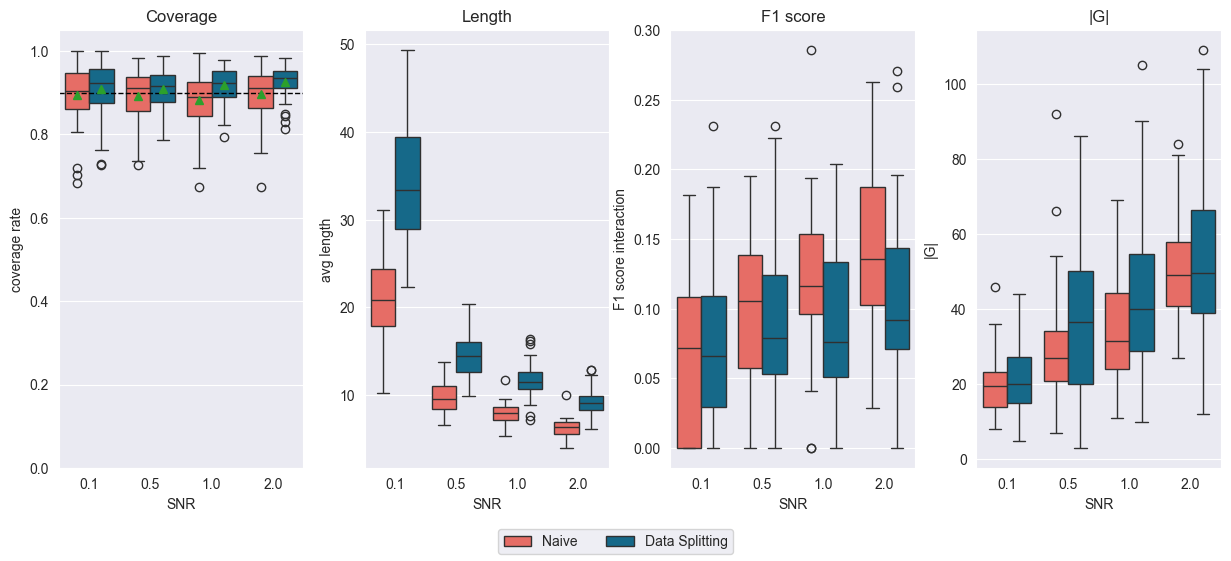

In [59]:
plotting(oper_char_df=oper_char_SNR_nl_block,
         x_axis="SNR",
         hue="method")

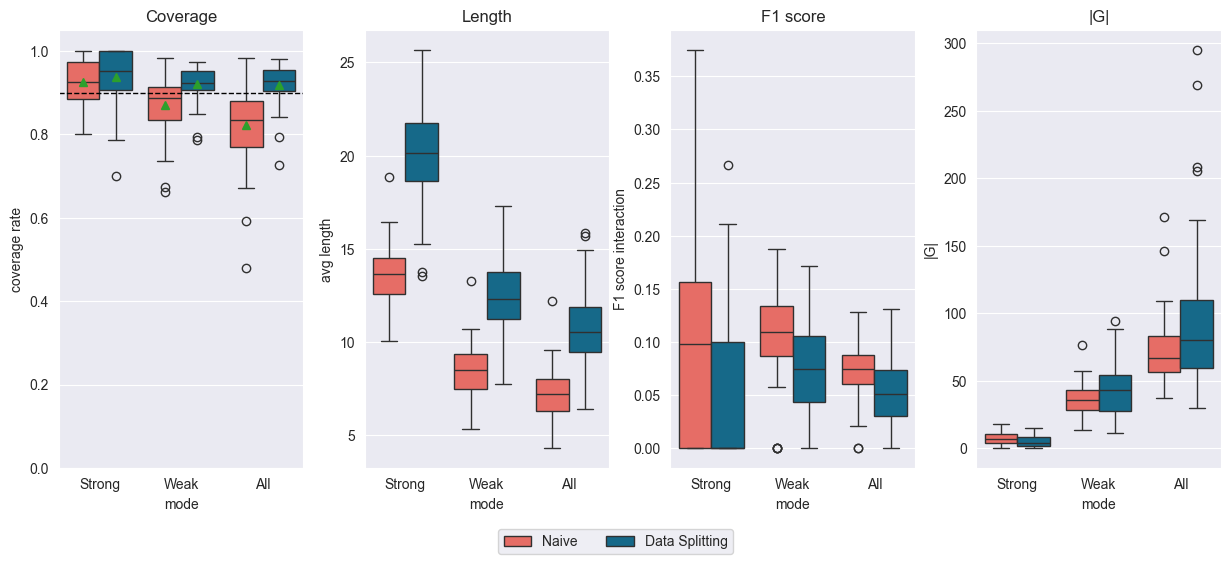

In [56]:
plotting(oper_char_df=oper_char_mode_nl_block,
         x_axis="mode",
         hue="method")